In [62]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Tesis Delincuencia Bucaramanga')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Tesis Delincuencia Bucaramanga


In [63]:
pip install rioxarray xarray pysal contextily


In [64]:
import matplotlib.pyplot as plt  # Graphics
import numpy as np
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas as pd # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

In [65]:
ref = pd.read_csv("Notebooks/brexit_vote.csv", index_col="Area_Code")

In [66]:
lads = geopandas.read_file(
    "Notebooks/Comunas_Bucaramanga.geojson"

).set_index("OBJECTID_1")

Primer test con datos aleatorios para hacer prueba de que el codigo funciona

In [67]:
delitos_dict = {1: 3, 2: 2, 3: 4, 4: 3, 5: 2, 6: 3, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 3, 13: 4, 14: 2, 15: 3, 16: 2, 17: 2, 18: 2}
df_delitos = pd.DataFrame(list(delitos_dict.items()), columns=['CODIGO', 'DELITOS'])
df_delitos['DELITOS'] = df_delitos['DELITOS'].astype('float64')
df_delitos['CODIGO'] = df_delitos['CODIGO'].astype('float64')
ref = df_delitos

In [68]:
ref

,CODIGO,DELITOS
0,1.0,3.0
1,2.0,2.0
2,3.0,4.0
3,4.0,3.0
4,5.0,2.0
5,6.0,3.0
6,7.0,2.0
7,8.0,2.0
8,9.0,2.0
9,10.0,3.0


In [69]:
#ref = lads["NMS"]
#ref = ref.to_frame()
#ref["DELITOS"] = np.random.randint(0, 11, size=len(ref))

In [70]:
lads = lads.merge(ref, on="CODIGO", how="left")

In [71]:
db = (
    geopandas.GeoDataFrame(
        lads, crs=lads.crs
    )
)

db.info()
db = db[["CODIGO","NMS" ,"geometry", "DELITOS"]]

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    17 non-null     int64   
 1   AREA        17 non-null     float64 
 2   BARRIOS_    17 non-null     float64 
 3   BARRIOS_ID  17 non-null     float64 
 4   NMS         17 non-null     object  
 5   NMS2        17 non-null     object  
 6   CODIGO      17 non-null     float64 
 7   Shape_Leng  17 non-null     float64 
 8   Shape_Le_1  17 non-null     float64 
 9   Shape_Area  17 non-null     float64 
 10  geometry    17 non-null     geometry
 11  DELITOS     17 non-null     float64 
dtypes: float64(8), geometry(1), int64(1), object(2)
memory usage: 1.7+ KB


In [72]:
db

,CODIGO,NMS,geometry,DELITOS
0,3.0,SAN FRANCISCO,"MULTIPOLYGON (((1104059.06628 1281859.61731, 1...",4.0
1,15.0,CENTRO,"MULTIPOLYGON (((1105421.64191 1279630.70270, 1...",3.0
2,13.0,ORIENTAL,"MULTIPOLYGON (((1106271.03168 1281474.67371, 1...",4.0
3,14.0,MORRORICO,"MULTIPOLYGON (((1107066.76788 1281551.51068, 1...",2.0
4,12.0,CABECERA DEL LLANO,"MULTIPOLYGON (((1107362.86951 1279984.51630, 1...",3.0
5,7.0,CIUDADELA,"MULTIPOLYGON (((1105876.89990 1277609.33551, 1...",2.0
6,6.0,LA CONCORDIA,"MULTIPOLYGON (((1106162.41248 1278448.43732, 1...",3.0
7,9.0,LA PEDREGOSA,"MULTIPOLYGON (((1107194.74469 1277490.09369, 1...",2.0
8,4.0,OCCIDENTAL,"MULTIPOLYGON (((1102481.72791 1282391.46832, 1...",3.0
9,8.0,SUROCCIDENTE,"MULTIPOLYGON (((1105975.22028 1277412.90491, 1...",2.0


In [73]:
overlap_check = db['geometry'].intersects(db['geometry'])
overlapping_polygons = db[overlap_check]

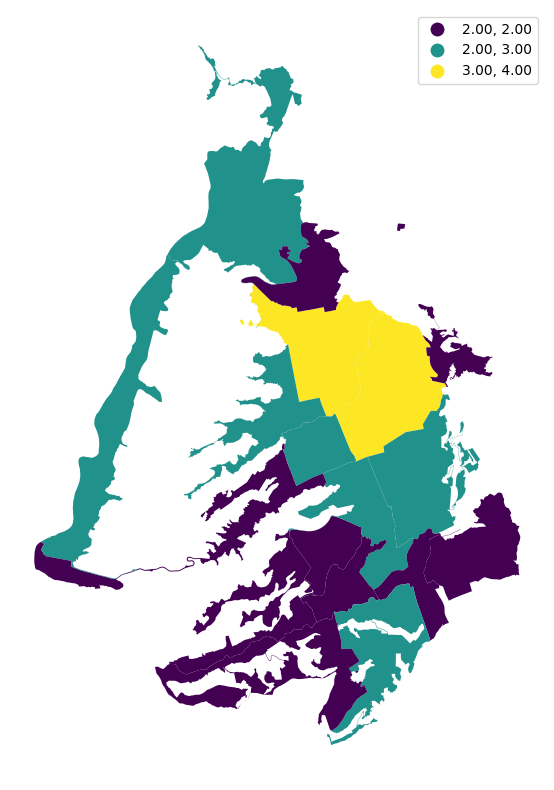

In [74]:
ax = db.plot(
    figsize=(10,10),
    column="DELITOS",
    aspect = 1,
    cmap="viridis",
    scheme = "quantiles",
    k = 3,
    legend = True
)

# Add a basemap using contextily


ax.set_axis_off();
# Remove axes
plt.show()

In [75]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(db, k=5)
# Row-standardization
w.transform = "R"

In [76]:
db["w_DELITOS"] = weights.lag_spatial(w, db['DELITOS'])

In [77]:
db["DELITOS_std"] = db["DELITOS"] - db["DELITOS"].mean()
db["w_DELITOS_std"] = weights.lag_spatial(w, db['DELITOS_std'])

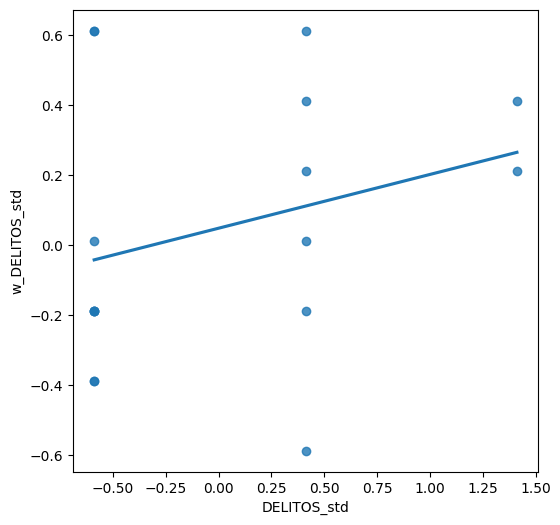

In [78]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="DELITOS_std", y="w_DELITOS_std", data=db, ci=None
)
plt.show()

In [79]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="DELITOS_std", y="w_DELITOS_std", data=db, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# Add text labels for each quadrant
plt.text(20, 5, "HH", fontsize=25, c="r")
plt.text(12, -11, "HL", fontsize=25, c="r")
plt.text(-20, 8.0, "LH", fontsize=25, c="r")
plt.text(-25, -11.0, "LL", fontsize=25, c="r")
# Display
plt.show()

In [80]:
lisa = esda.moran.Moran_Local(db["DELITOS"], w)

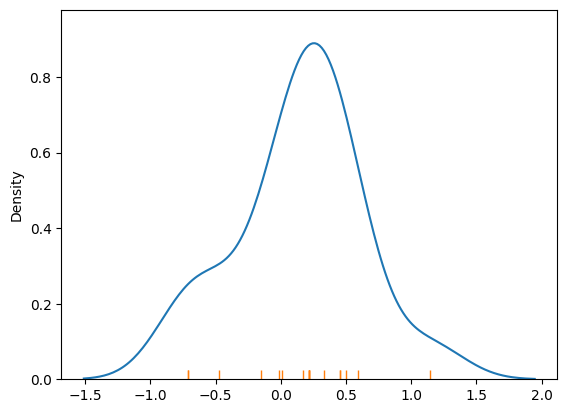

In [81]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

In [82]:
from splot import esda as esdaplot

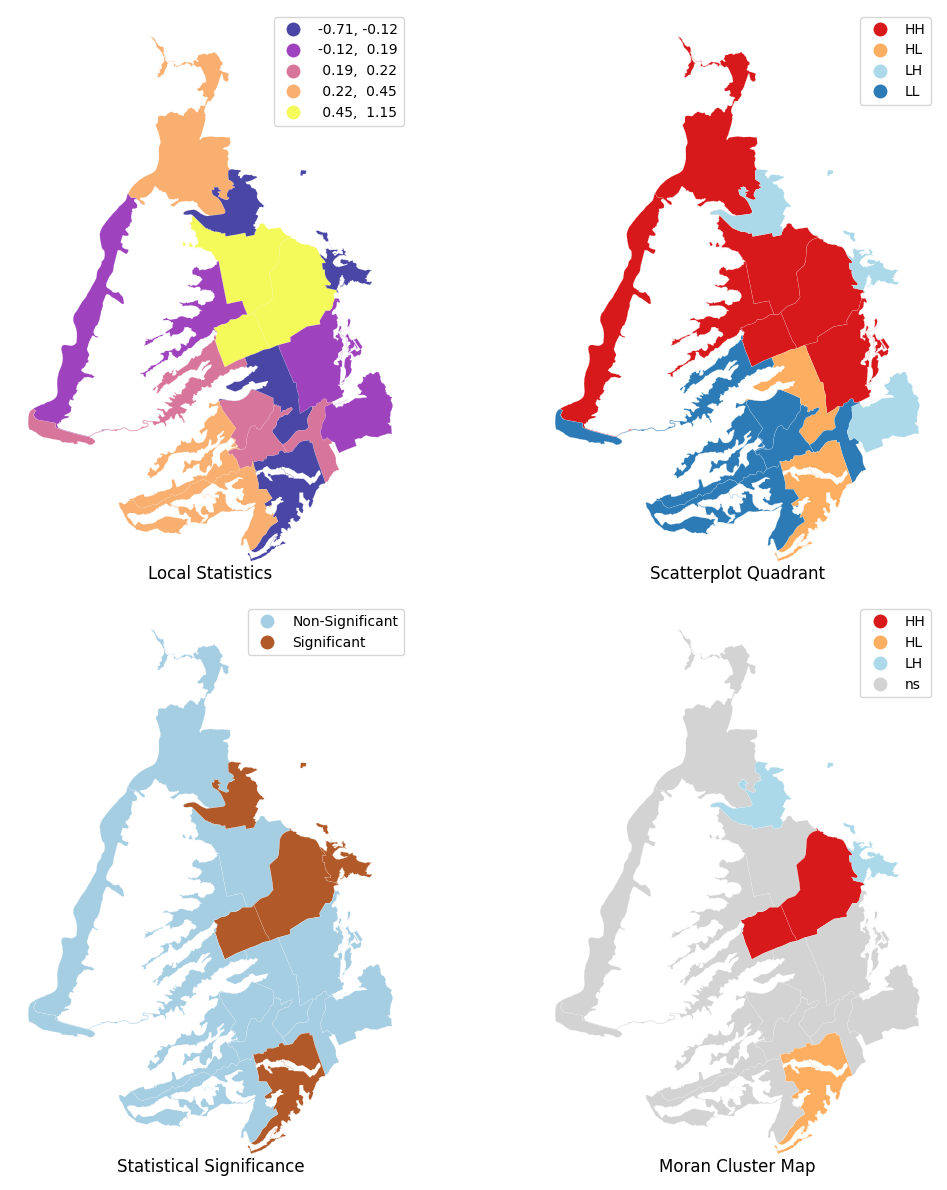

In [83]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
db.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    aspect = 1,
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax

)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax, aspect = 1)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    aspect = 1,
    legend=True,
    ax = ax


)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, db, p=0.05, ax=ax, aspect = 1)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [84]:
lisa.q[:10]

array([1, 1, 1, 2, 1, 3, 4, 3, 1, 3])

In [85]:
counts = pd.value_counts(lisa.q)
counts

1    6
3    6
2    3
4    2
dtype: int64

In [86]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

29.41176470588235

In [87]:
# Assign pseudo P-values to `db`
db["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
db["sig"] = sig
# Print top of the table to inspect
db[["sig", "p-sim"]].head()

,sig,p-sim
0,0,0.196
1,1,0.027
2,1,0.041
3,1,0.041
4,0,0.308


In [88]:
# Print bottom of the table to inspect
db[["sig", "p-sim"]].tail()

,sig,p-sim
12,1,0.001
13,0,0.083
14,1,0.040
15,0,0.122
16,0,0.470


In [89]:
# Pick as part of a quadrant only significant polygons,
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
db["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
db["labels"].head()

0    Non-Significant
1                 HH
2                 HH
3                 LH
4    Non-Significant
Name: labels, dtype: object

In [90]:
db["labels"].value_counts()

Non-Significant    12
HH                  2
LH                  2
HL                  1
Name: labels, dtype: int64

In [91]:
# Gi
delitos_data = db["DELITOS"].to_numpy(dtype='float64')
go_i = esda.getisord.G_Local(delitos_data, w)
# Gi*
go_i_star = esda.getisord.G_Local(delitos_data, w, star=True)

/usr/local/lib/python3.10/dist-packages/esda/getisord.py:615: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  warnings.warn(


In [92]:
def g_map(g, db, ax):
    """
    Create a cluster map
    ...

    Arguments
    ---------
    g      : G_Local
             Object from the computation of the G statistic
    db     : GeoDataFrame
             Table aligned with values in `g` and containing
             the geometries to plot
    ax     : AxesSubplot
             `matplotlib` axis to draw the map on

    Returns
    -------
    ax     : AxesSubplot
             Axis with the map drawn
    """
    ec = "0.8"

    # Break observations into significant or not
    sig = g.p_sim < 0.05

    # Plot non-significant clusters
    ns = db.loc[sig == False, "geometry"]
    ns.plot(ax=ax, color="lightgrey", edgecolor=ec, linewidth=0.1, aspect = 1)
    # Plot HH clusters
    hh = db.loc[(g.Zs > 0) & (sig == True), "geometry"]
    hh.plot(ax=ax, color="red", edgecolor=ec, linewidth=0.1, aspect = 1)
    # Plot LL clusters
    ll = db.loc[(g.Zs < 0) & (sig == True), "geometry"]
    ll.plot(ax=ax, color="blue", edgecolor=ec, linewidth=0.1, aspect = 1)
    # Style and draw

    # Flag to add a star to the title if it's G_i*
    st = ""
    if g.star:
        st = "*"
    # Add title
    ax.set_title(f"G{st} statistic for Pct of Leave votes", size=15)
    # Remove axis for aesthetics
    ax.set_axis_off()
    return ax

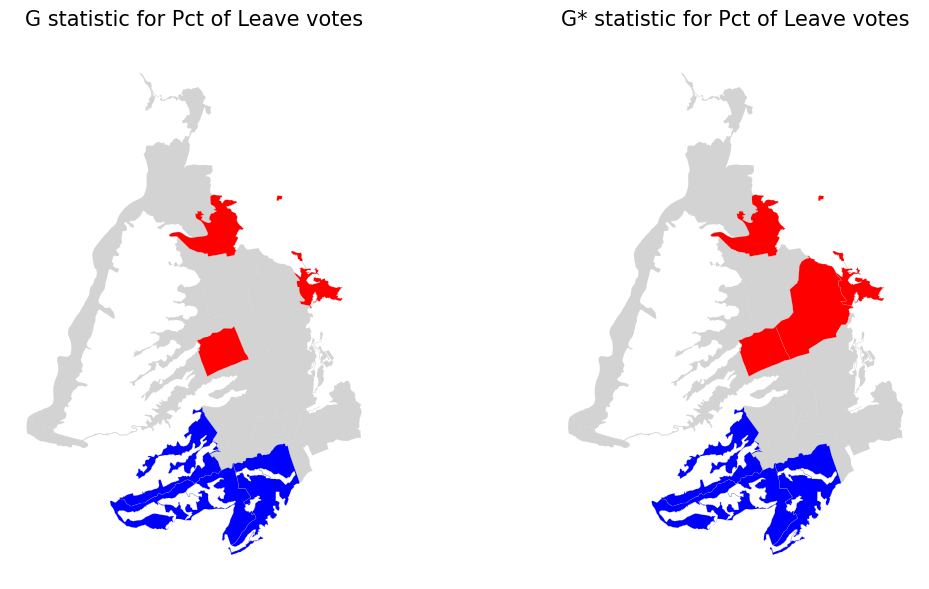

In [93]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Loop over the two statistics
for g, ax in zip([go_i, go_i_star], axs.flatten()):
    # Generate the statistic's map
    ax = g_map(g, db, ax)
# Tight layout to minimise blank spaces
f.tight_layout()
# Render
plt.show()